# Influenza Type Classifer

In [1]:
import pandas as pd
df1=pd.read_csv("../input/labdata/lab flu confirmed 2008-2013.csv")
df2 =pd.read_csv("../input/labdata/lab flu confirmed 2014 - 2019.csv")

df1= df1.iloc[:, 0:6]
df1.head()

,Week Ending (Friday),State,Age group,Sex,Indigenous status,Type/Subtype
0,03/01/2014,NSW,35-39,Female,not available,A(H3N2)
1,03/01/2014,NSW,80-84,Female,not available,A(unsubtyped)
2,03/01/2014,NSW,80-84,Male,not available,A(unsubtyped)
3,03/01/2014,NSW,85+,Female,not available,A(H3N2)
4,03/01/2014,NT,00-04,Male,non-Indigenous,B


In [2]:
df2= df2.iloc[:, 0:6]
df2.head()

,Week Ending (Friday),State,Age group,Sex,Indigenous status,Type/Subtype
0,03/01/2020,NSW,00-04,Female,not available,A(H1N1)pdm09
1,03/01/2020,NSW,00-04,Female,not available,A(unsubtyped)
2,03/01/2020,NSW,00-04,Female,not available,A(unsubtyped)
3,03/01/2020,NSW,00-04,Male,not available,A(unsubtyped)
4,03/01/2020,NSW,00-04,Male,not available,A(unsubtyped)


In [3]:
#put the two df's together
df = pd.concat([df2, df1], axis=0)
df.head()
print(len(df))

1049869


In [4]:
# create labels
flu_types= df['Type/Subtype'].unique()
print(flu_types)

['A(H1N1)pdm09' 'A(unsubtyped)' 'B' 'A(H3N2)' 'A and B' 'Untyped' 'C'
 'A(H1N1)']


In [5]:
risk = ['pandemic_H1', 'pandemic_unknown', 'seasonal', 'pandemic_H3', 'seasonal_mixed', 'unknown', 'low_risk', 'pre-pandemic']

In [6]:
#create dictionary
risk_dict= dict(zip(flu_types, risk))
print(risk_dict)

{'A(H1N1)pdm09': 'pandemic_H1', 'A(unsubtyped)': 'pandemic_unknown', 'B': 'seasonal', 'A(H3N2)': 'pandemic_H3', 'A and B': 'seasonal_mixed', 'Untyped': 'unknown', 'C': 'low_risk', 'A(H1N1)': 'pre-pandemic'}


In [7]:
#replace class column with classification
df['Class'] = df['Type/Subtype']
df.head()
flu=df.replace({"Class": risk_dict})
flu.head()

,Week Ending (Friday),State,Age group,Sex,Indigenous status,Type/Subtype,Class
0,03/01/2020,NSW,00-04,Female,not available,A(H1N1)pdm09,pandemic_H1
1,03/01/2020,NSW,00-04,Female,not available,A(unsubtyped),pandemic_unknown
2,03/01/2020,NSW,00-04,Female,not available,A(unsubtyped),pandemic_unknown
3,03/01/2020,NSW,00-04,Male,not available,A(unsubtyped),pandemic_unknown
4,03/01/2020,NSW,00-04,Male,not available,A(unsubtyped),pandemic_unknown


In [8]:
flu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049869 entries, 0 to 178631
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Week Ending (Friday)  1049869 non-null  object
 1   State                 1049869 non-null  object
 2   Age  group            1049869 non-null  object
 3   Sex                   1049869 non-null  object
 4   Indigenous status     1049869 non-null  object
 5   Type/Subtype          1049869 non-null  object
 6   Class                 1049869 non-null  object
dtypes: object(7)
memory usage: 64.1+ MB


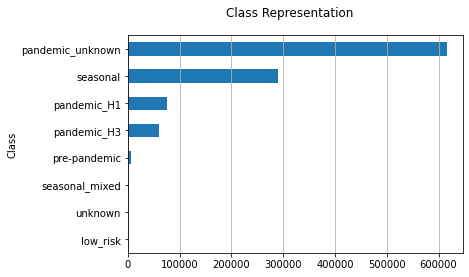

In [9]:
# Label frequency
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.suptitle("Class Representation", fontsize=12)
flu["Class"].reset_index().groupby("Class").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

# Pre-processing for Text Classification

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize and fit CountVectorizer with given text documents
vectorizer = CountVectorizer(analyzer='char').fit(flu['Type/Subtype'])

# use the vectorizer to transform the document into word count vectors (Sparse)
word_mat = vectorizer.transform(flu['Type/Subtype'])

In [11]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# using the encoder to encode the categorical columns
y = labelencoder.fit_transform(flu['Class'])

## Split Data

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(word_mat, y, test_size=0.3)

# Modeling
### Training

In [13]:
# Model Training
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
# instantiate the model as clf(classifier) and train it
clf = MultinomialNB()
clf.fit(x_train, y_train)

mod = LogisticRegression()
mod.fit(x_train, y_train)

LogisticRegression()

## Prediction / Evaluation

In [14]:
#make class predictions
pred = clf.predict(x_test)
#transform labels back to text
preds = labelencoder.inverse_transform(pred)
preds

#make class predictions
predm = mod.predict(x_test)
#transform labels back to text
predsm = labelencoder.inverse_transform(predm)
predsm

array(['pandemic_unknown', 'pandemic_unknown', 'pandemic_unknown', ...,
       'pandemic_unknown', 'seasonal', 'seasonal'], dtype=object)

In [15]:
#Transform test target back to text
yt= labelencoder.inverse_transform(y_test)
yt
ytm= labelencoder.inverse_transform(y_test)
yt

array(['pandemic_unknown', 'pandemic_unknown', 'pandemic_unknown', ...,
       'pandemic_unknown', 'seasonal', 'seasonal'], dtype=object)

In [16]:
# confusiong matrix
# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt, preds)

cm2 = confusion_matrix(ytm, predsm)


In [17]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['pandemic_H1', 'pandemic_unknown', 'seasonal', 'pandemic_H3', 'seasonal_mixed', 'unknown', 'low_risk', 'pre-pandemic'], 
                     columns = ['pandemic_H1', 'pandemic_unknown', 'seasonal', 'pandemic_H3', 'seasonal_mixed', 'unknown', 'low_risk', 'pre-pandemic'])


cm_df2 = pd.DataFrame(cm2,
                     index = ['pandemic_H1', 'pandemic_unknown', 'seasonal', 'pandemic_H3', 'seasonal_mixed', 'unknown', 'low_risk', 'pre-pandemic'], 
                     columns = ['pandemic_H1', 'pandemic_unknown', 'seasonal', 'pandemic_H3', 'seasonal_mixed', 'unknown', 'low_risk', 'pre-pandemic'])

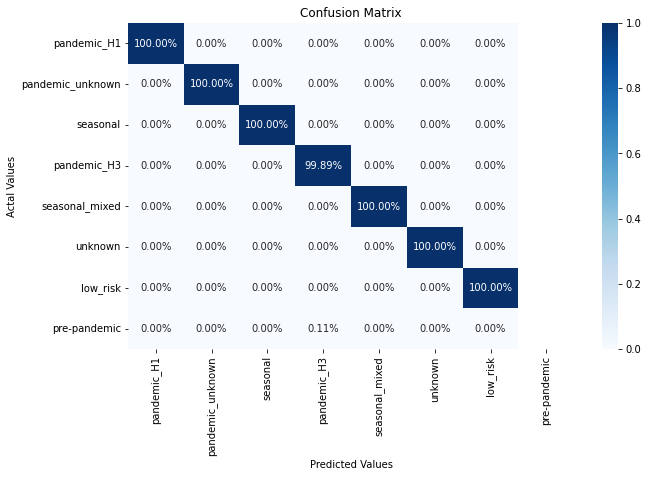

In [18]:
import seaborn as sns
import numpy as np
#Plotting the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm_df/np.sum(cm_df), annot=True, cmap='Blues', fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

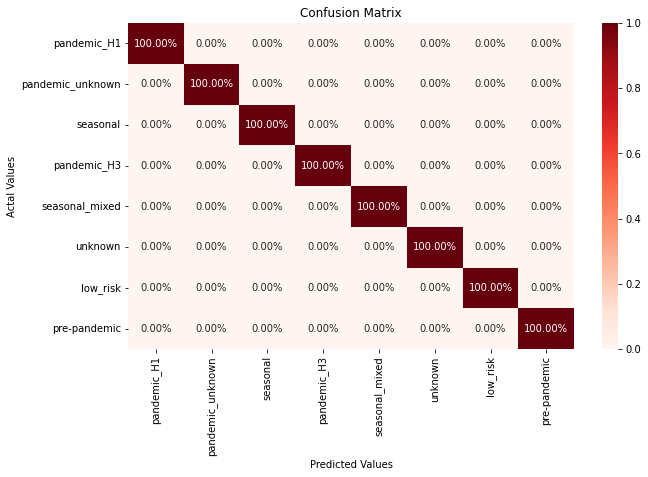

In [19]:
import seaborn as sns
import numpy as np
#Plotting the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm_df2/np.sum(cm_df2), annot=True, cmap='Reds', fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Epidemic Classifier 

In [20]:
#load data
df2=pd.read_csv("../input/labdata/FluNetInteractiveReport.csv")



In [32]:
import os

filepaths = [f for f in os.listdir("../input/labdata") if f.endswith('.csv')]
data= pd.concat(map(pd.read_csv, filepaths, ))
#csvs=(pd.read_csv(f, on_bad_lines='skip') for f in filepaths)
#data= pd.concat(csvs ,ignore_index=True)
data.head(1)

FileNotFoundError: [Errno 2] No such file or directory: 'FluNetInteractiveReport.csv'

# Epidemic Predictor

In [ ]:
import os
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from scipy import stats
import seaborn as sns

In [ ]:
%%time
#Lookup layer layer for week
week = data.Week
weeks = list(week.unique())
week_size = len(weeks) + 1
week_lookup_layer = layers.IntegerLookup(max_tokens=week_size)
week_lookup_layer.adapt(pd.DataFrame({"weeks":weeks}))

In [ ]:
data.columns

In [ ]:
features = ['Country', 'WHOREGION', 'FLUREGION', 'Year',
       'SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB', 'AH1', 'AH1N12009', 'AH3',
       'AH5', 'ANOTSUBTYPED', 'INF_A', 'BYAMAGATA', 'BVICTORIA',
       'BNOTDETERMINED', 'INF_B', 'ALL_INF', 'ALL_INF2']
y=data.TITLE

### Transform categorical columns

In [ ]:
df3=data
## Label encode the text
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# using the encoder to encode the categorical columns
for column in df3.iloc[:,0:3]:
    df3[column] = labelencoder.fit_transform(df3[column])
   

In [ ]:
df3.head()

In [ ]:
#one hot encode the categores from label encoder
from sklearn.preprocessing import OneHotEncoder
#for column in df2.iloc[:,0:3]:
 #   onehotencoder = OneHotEncoder()
  #  df2.column = onehotencoder.fit_transform(column).toarray()
onehotencoder = OneHotEncoder()
df3.iloc[:,0:3]= onehotencoder.fit_transform(df3.iloc[:,0:3]).toarray()
df3.head(2)

In [ ]:
df3.head(2)

#### Make tensorflow dataset

In [ ]:
import tensorflow as tf
def preprocess(X, y):
    return X, y
def make_dataset(feature, week, y, batch_size=52, mode="train"):
    ds = tf.data.Dataset.from_tensor_slices(((week, feature), y))
    ds = ds.map(preprocess)
    if mode == "train":
        ds = ds.shuffle(4096)
    ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [ ]:
#define the model function
def get_model():
    week_inputs = tf.keras.Input((1, ), dtype=tf.uint16)
    features_inputs = tf.keras.Input((18, ), dtype=tf.float16)
    
    investment_id_x = investment_id_lookup_layer(investment_id_inputs)
    investment_id_x = layers.Embedding(investment_id_size, 32, input_length=1) (investment_id_x)
    investment_id_x = layers.Reshape((-1, ))(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    
    feature_x = layers.Dense(256, activation='swish')(features_inputs)
    feature_x = layers.Dense(256, activation='swish')(feature_x)
    feature_x = layers.Dense(256, activation='swish')(feature_x)
    
    x = layers.Concatenate(axis=1)([investment_id_x, feature_x])
    x = layers.Dense(512, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dense(128, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dense(32, activation='swish', kernel_regularizer="l2")(x)
    output = layers.Dense(1)(x)
    
    #model metrics
    rmse = keras.metrics.RootMeanSquaredError(name="rmse")
    model = tf.keras.Model(inputs=[investment_id_inputs, features_inputs], outputs=[output])
    # compiling the model
    model.compile(optimizer=tf.optimizers.Adam(0.001), loss='mse', metrics=['mse', "mae", "mape", rmse])
    return model

### Resources/ References
* Data: [Australian Government](https://www1.health.gov.au/internet/main/publishing.nsf/Content/ohp-pub-datasets.htm)